In [1]:
#Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
#API Keys for twitter
Consumer_APIkey = "mCTjowaxt1qrTtxssIiu6Y7h9"
Consumer_APIsecret = "lctzQUzk2rApzaX7XvvP0kLIU5c9XK93BrNOfNXAW9o8SUu2Rf"
Access_Token = "772933790498861056-uxgL5y35imSXyAMTrB412k9fYgu4UHS"
Access_Tokensecret = "X1HTHMejcJGgi0LpoxjwBkzyX5UnuSbadyggl0YkVyS86"

#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(Consumer_APIkey, Consumer_APIsecret)
auth.set_access_token(Access_Token, Access_Tokensecret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#Target Search Term
target_terms = ['@BBC','@CBS','@CNN','@FoxNews','@nytimes']

In [4]:
    # Variables for holding sentiments and for dataframe
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = [] 
    
    news_organizations = []
    text = []
    date = []
    tweets_ago = []

In [5]:
# looping through users
for user in target_terms:
    
    # tweets count
    tweet_count = 0

    # Get the last 100 tweets (5*20)
    for x in range(5):
        
        public_tweets = api.user_timeline(user, page=x)

        # Loop through tweets
        for tweet in public_tweets:
        
            # Incrementing tweet_count
            tweet_count += 1
    
            # Add values to list
            news_organizations.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            # Run Analysis on tweets
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add values to the list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)

In [6]:
# to create DataFrame
TweetData = pd.DataFrame({"News Organization": news_organizations,
                          "Tweet Content": text,
                          "Date & Time (UTC)": date,
                          "Compound Score": compound_list,
                          "Positive Score": positive_list,
                          "Neutral Score": neutral_list,
                          "Negative Score": negative_list,
                          "Tweets Ago": tweets_ago})

In [7]:
TweetData.head()

,Compound Score,Date & Time (UTC),Negative Score,Neutral Score,News Organization,Positive Score,Tweet Content,Tweets Ago
0,0.0772,Mon Jan 08 15:27:21 +0000 2018,0.000,0.925,@BBC,0.075,📚Eight books that will make you want to run aw...,1
1,0.6908,Mon Jan 08 15:00:07 +0000 2018,0.000,0.769,@BBC,0.231,💔💍 If you're married then it might be best to ...,2
2,0.5106,Mon Jan 08 14:30:06 +0000 2018,0.000,0.710,@BBC,0.290,Repeat bouts of warmer seawater are posing a s...,3
3,0.3182,Mon Jan 08 14:03:04 +0000 2018,0.111,0.728,@BBC,0.161,'Having kids ruins your life in the best way p...,4
4,-0.6739,Mon Jan 08 13:43:59 +0000 2018,0.476,0.524,@BBC,0.000,RT @bbcthesocial: WTF is #hygge? https://t.co/...,5


In [8]:
#TweetData.info()

In [9]:
# info based on News Organizations 
bbc = TweetData.loc[TweetData["News Organization"] == "@BBC"]
cbs = TweetData.loc[TweetData["News Organization"] == "@CBS"]
cnn = TweetData.loc[TweetData["News Organization"] == "@CNN"]
fox = TweetData.loc[TweetData["News Organization"] == "@FoxNews"]
nyt = TweetData.loc[TweetData["News Organization"] == "@nytimes"]

In [10]:
# Scatter plots
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='b', s=50, alpha=0.95, label='BBC')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='r', s=50, alpha=0.95, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='g', s=50, alpha=0.95, label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='m', s=50, alpha=0.95, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='k', s=50, alpha=0.95, label='New York Times')

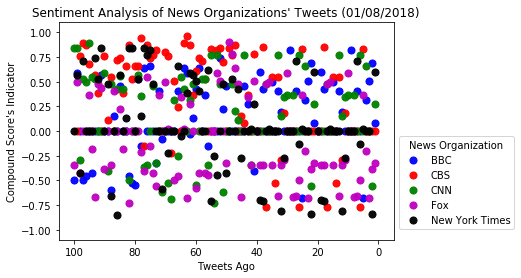

In [11]:
# Plot title and lables
plt.title("Sentiment Analysis of News Organizations' Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Compound Score's Indicator")
plt.ylim(-1.1,1.1)
plt.legend(title='News Organization', fontsize='medium')
#moving legend outside the chart
plt.legend(bbox_to_anchor=(1, 0.5), title='News Organization', fontsize='medium')


plt.show()

In [12]:
# bar chart
plt.bar(0, bbc['Compound Score'].mean(), color='b', width=0.75)
plt.bar(1, cbs['Compound Score'].mean(), color='r', width=0.75)
plt.bar(2, cnn['Compound Score'].mean(), color='g', width=0.75)
plt.bar(3, fox['Compound Score'].mean(), color='m', width=0.75)
plt.bar(4, nyt['Compound Score'].mean(), color='k', width=0.75)

<Container object of 1 artists>

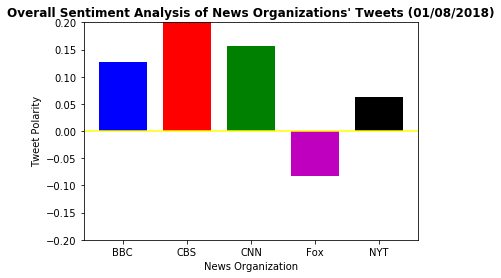

In [13]:
# Plot title and lables
plt.title("Overall Sentiment Analysis of News Organizations' Tweets (%s)" % (time.strftime("%m/%d/%Y")),
                                                                           fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.xlabel("News Organization")
plt.axhline(y=0, color = 'yellow') 
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

plt.show()